# Numerical solution of the Fokker-Planck Equation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### The Fokker Planck equation for the phase space probability distribution of the noisy van der Pol oscillator reads
$$
\frac{\partial w(\xi_i,t)}{\partial t}=-\frac{\partial}{\partial\xi_i}D_iw(\xi_i,t)+
D_{ij}\frac{\partial^2 w(\xi_i,t)}{\partial\xi_i\partial\xi_j}
$$
with the vector $\mathbf{\xi}=(x,v)^T$ and
\begin{align}
D_x^{(1)}=v\\
D_v^{(1)}=(2-x^2)v-x-\gamma v\\
D_vv^{(1)}=g\\
\end{align}
where the nonliearity $(2-x^2)v$ was taken form Gradisek, J et. al PRE 62, 3146

In [2]:
# 1st derivative w.r.t. x
def dwdx(m):
    return (np.roll(m,shift=(-1,0),axis=(1,0))-np.roll(m,shift=(1,0),axis=(1,0)))/2.
# 1st central derivative w.r.t. v
def dwdv(m):
    return (np.roll(m,shift=(0,-1),axis=(1,0))-np.roll(m,shift=(0,1),axis=(1,0)))/2.
# 2nd derivative w.r.t. x
def d2wdx2(m):
    return np.roll(m,shift=(-1,0),axis=(1,0))-2.0*m+np.roll(m,shift=(1,0),axis=(1,0))
# 2nd derivative w.r.t. v
def d2wdv2(m):
    return np.roll(m,shift=(0,-1),axis=(1,0))-2.0*m+np.roll(m,shift=(0,1),axis=(1,0))
# mixed 2nd derivative
def d2wdxdv(m):
    return np.roll(m,shift=(-1,-1),axis=(1,0))+np.roll(m,shift=(-1,1),axis=(1,0))-np.roll(m,shift=(1,1),axis=(1,0))-np.roll(m,shift=(1,-1),axis=(1,0))

#### In the case of a van der Pol oscillator we have
$$
\frac{\partial w(x,v,t)}{\partial t}=-(2-x^2)w(x,v,t)-v\frac{\partial w(x,v,t)}{\partial x}+
(x-(2-x^2)v)\frac{\partial w(x,v,t)}{\partial v}+
g\frac{\partial^2 w(x,v,t)}{\partial v^2}
$$
In terms of finite differences with Euler forward we have
$$
w(x,v,t+\Delta t)=
(1-(2-x^2)\Delta t)\cdot w(x,v,t)
-v\frac{w(x+\Delta x,v,t)-w(x-\Delta x,v,t)}{2\Delta x}\Delta t
+(x-(2-x^2)v)\frac{w(x,v+\Delta v,t)-w(x,v-\Delta v,t)}{2\Delta v} \Delta t
+g\frac{w(x,v+\Delta v,t)-2\cdot w(x,v,t)+w(x,v-\Delta v,t)}{\Delta v^2}\Delta t
$$

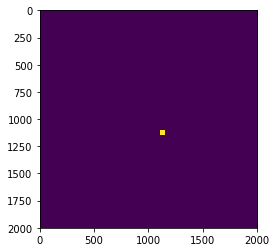

In [7]:
x,v=np.meshgrid(np.linspace(-1000,1000,2001),np.linspace(-1000,1000,2001))
wxv=np.zeros((2001,2001))
wxv[1101:1151,1101:1151]=1.0
plt.imshow(wxv)

/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()
/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()
/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':
/Users/greiner/miniconda3/lib/python3.7/site-packages/ipykern

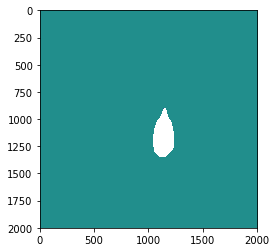

In [11]:
dt=.0001 # timestep
c=1.0    # diffusion constant
#
xsq=x*x
xsqv=x*x*v
#
for i in np.arange(100):
    wxv[1:-2,1:-2]=(wxv-(2-xsq)*wxv*dt
                    -v*dwdx(wxv)*dt
                    +(x-2*v+xsqv))*dwdv(wxv)*dt
                    +c*d2wdv2(wxv)*dt)[1:-2,1:-2]
plt.imshow(wxv)

In [10]:
wxv.max()

2.4628414870822224e+254